In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/sierraleone-bumbuna.csv")

In [4]:
print("top 5 data")
df.head()

top 5 data


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## Summary

In [5]:
# Describing numeric columns
print("-----------------------------------------------")
print("Describing numeric columns")
display(df.select_dtypes(include='number').describe())
print("-----------------------------------------------")
print("Listing columns with nulls > 5%")
null_percent = df.isnull().mean() * 100
cols_with_nulls = null_percent[null_percent > 5]
display(cols_with_nulls)
print("-----------------------------------------------")


-----------------------------------------------
Describing numeric columns


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


-----------------------------------------------
Listing columns with nulls > 5%


Comments    100.0
dtype: float64

-----------------------------------------------


## Missing values checks

In [6]:
print("-----------------------------------------------")
print("Missing value check")
df.isnull().sum()

-----------------------------------------------
Missing value check


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

## Data Types

In [7]:
print("Checking data types")
df.dtypes

Checking data types


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

## Checks for incorrect data

In [8]:
print("Check for incorrect values")
import pandas as pd

def check_sensor_data(df: pd.DataFrame):
    required_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    missing = [col for col in required_cols if col not in df.columns]
    
    if missing:
        raise ValueError(f"Missing columns: {missing}")

    issues = {}

    # GHI, DNI, DHI checks
    for col in ['GHI', 'DNI', 'DHI']:
        issues[f'{col}_negative'] = df[df[col] < 0].index.tolist()
    
    # DHI should not exceed GHI
    issues['DHI_gt_GHI'] = df[df['DHI'] > df['GHI']].index.tolist()

    # GHI should not exceed ~1300 W/m²
    issues['GHI_above_1300'] = df[df['GHI'] > 1300].index.tolist()

    # Sensor irradiance checks (ModA, ModB)
    for col in ['ModA', 'ModB']:
        issues[f'{col}_negative'] = df[df[col] < 0].index.tolist()
        issues[f'{col}_above_1300'] = df[df[col] > 1300].index.tolist()

    # Wind speed (WS, WSgust) checks
    for col in ['WS', 'WSgust']:
        issues[f'{col}_negative'] = df[df[col] < 0].index.tolist()
        issues[f'{col}_above_40'] = df[df[col] > 40].index.tolist()  # adjust for your climate

    # WSgust should not be less than WS
    issues['WSgust_lt_WS'] = df[df['WSgust'] < df['WS']].index.tolist()

    # Summary report
    for key, idxs in issues.items():
        if idxs:
            print(f"{key}: {len(idxs)} at rows {idxs[:5]}{'...' if len(idxs) > 5 else ''}")

    return issues

Check for incorrect values


In [9]:
issues = check_sensor_data(df)

GHI_negative: 261135 at rows [0, 1, 2, 3, 4]...
DNI_negative: 266352 at rows [0, 1, 2, 4, 5]...
DHI_negative: 263128 at rows [0, 1, 2, 3, 4]...
DHI_gt_GHI: 89838 at rows [441, 445, 458, 462, 474]...
GHI_above_1300: 125 at rows [298859, 298860, 298861, 353512, 353588]...
ModA_above_1300: 90 at rows [18017, 113075, 356437, 404016, 405401]...
ModB_above_1300: 50 at rows [356437, 405406, 405408, 422701, 422702]...


In [10]:
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


## Distribution Checks

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For prettier plots
sns.set(style="whitegrid")

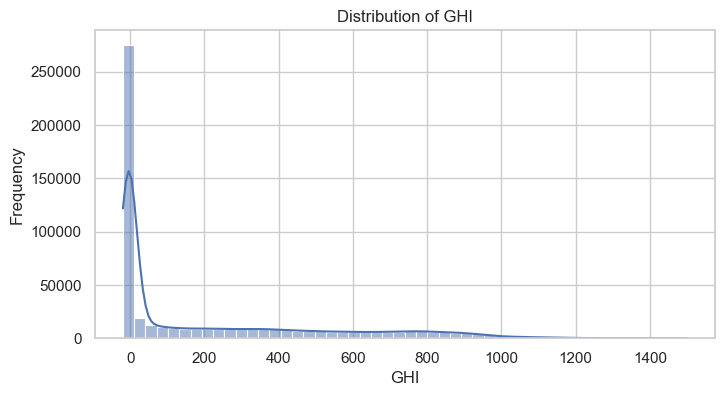

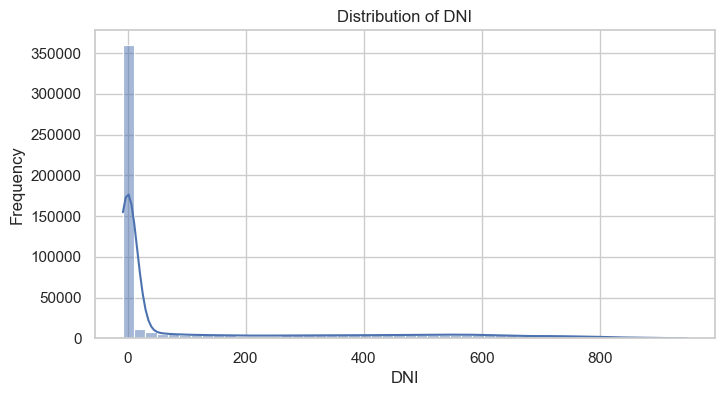

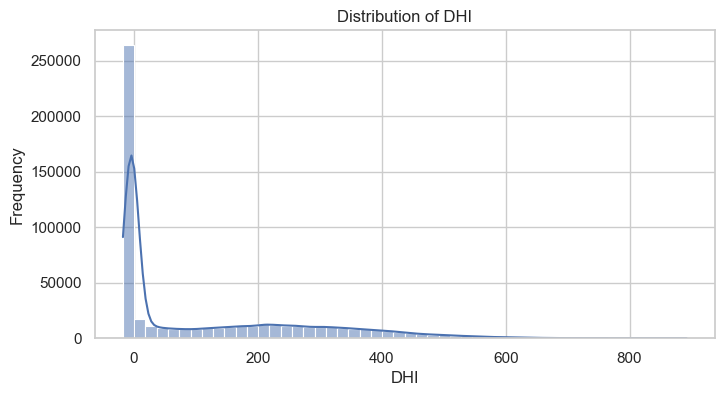

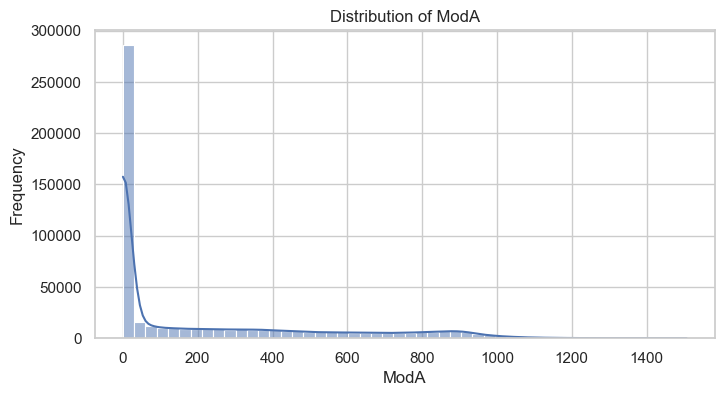

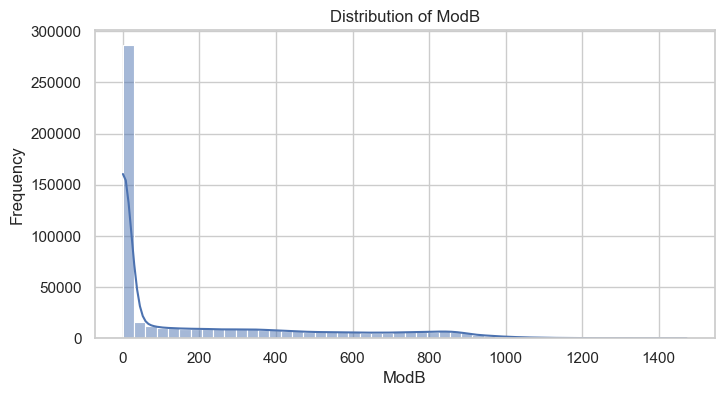

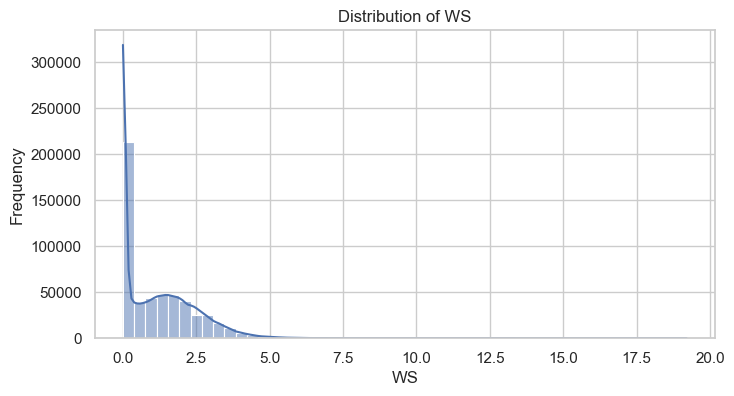

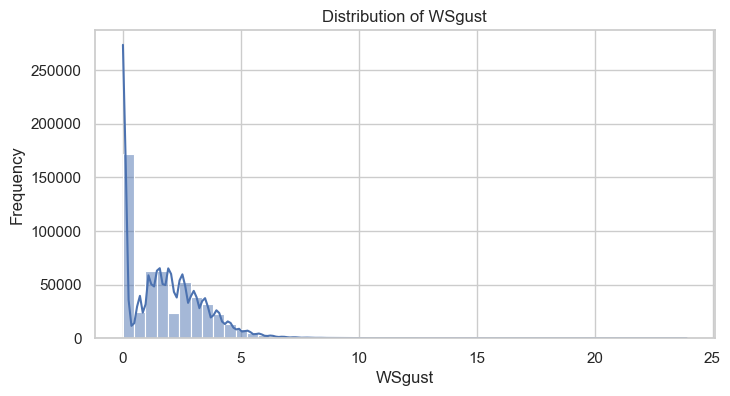

In [12]:
columns_to_plot = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Loop through and plot each distribution
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Outlier Checks

In [14]:
print("Calculating outliers")
from scipy.stats import zscore
import numpy as np

def flag_zscore_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    df_copy = df.copy()
    z_scores = df_copy[columns].apply(zscore)

    # Create a boolean mask of rows where any Z-score > 3 in magnitude
    outlier_mask = (np.abs(z_scores) > 3)
    df_copy['z_outlier'] = outlier_mask.any(axis=1)

    print(f"Flagged {df_copy['z_outlier'].sum()} outlier rows (|Z| > 3).")
    return df_copy


Calculating outliers


In [15]:
# Define the relevant columns
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Step 2: Flag Z-score outliers
df_with_outliers = flag_zscore_outliers(df, cols_to_check)

Flagged 16292 outlier rows (|Z| > 3).


In [16]:
df_with_outliers

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,z_outlier
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,False
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,False
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,False
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,False
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,False


## Cleaning and Exporting

In [17]:
print("Dropping Comments Column")
df.drop('Comments', axis=1, inplace=True)

Dropping Comments Column


In [18]:
print("Exporting cleaned data to csv")
df.to_csv("../data/processed/sierraleone-cleaned.csv", index=False)

Exporting cleaned data to csv


## Time Series Analysis

In [19]:
print("Time Series Analysis")
import pandas as pd
import matplotlib.pyplot as plt

def plot_irradiance_temperature(df: pd.DataFrame):
    df = df.copy()
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    plt.figure(figsize=(14, 6))
    plt.plot(df['Timestamp'], df['GHI'], label='GHI')
    plt.plot(df['Timestamp'], df['DNI'], label='DNI')
    plt.plot(df['Timestamp'], df['DHI'], label='DHI')
    plt.plot(df['Timestamp'], df['Tamb'], label='Tamb (°C)', linestyle='--')

    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.title('Irradiance and Ambient Temperature over Time')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

Time Series Analysis


In [20]:
print("Convert Timestamp to datetime")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

Convert Timestamp to datetime


C:\Users\redie\AppData\Local\Temp\ipykernel_31120\896183423.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


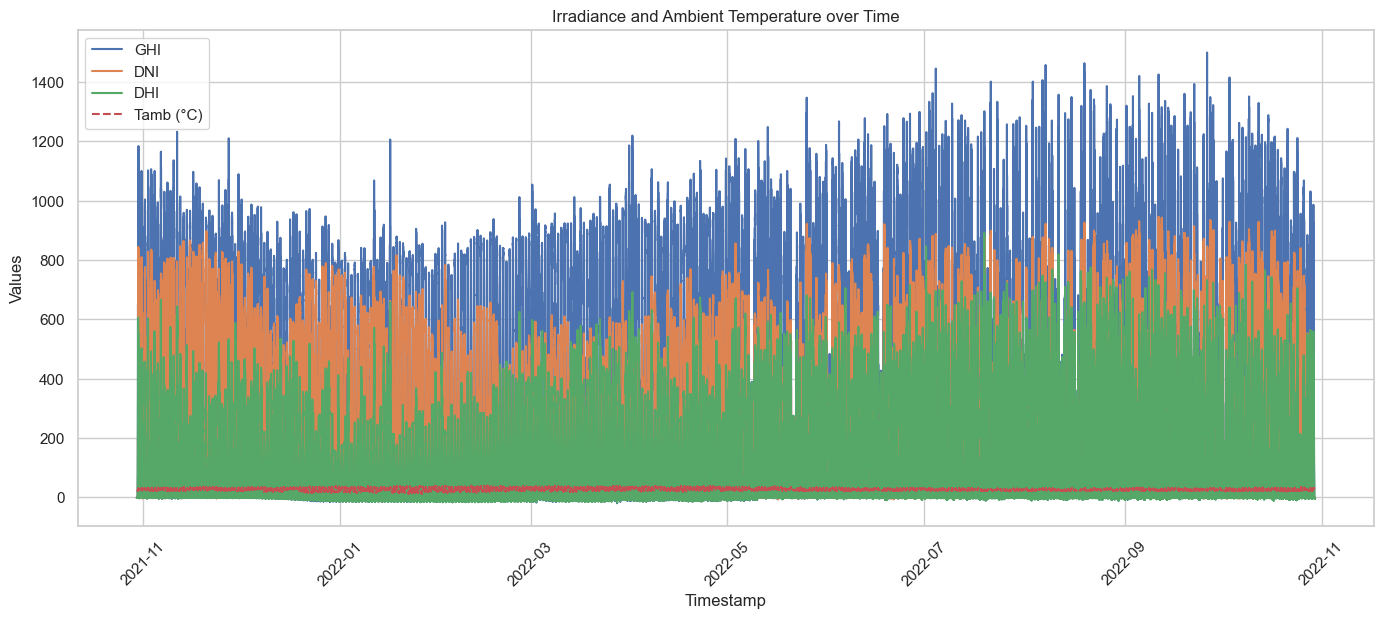

In [21]:
plot_irradiance_temperature(df)

## Monthly Patterns

In [22]:
df = pd.read_csv("../data/processed/sierraleone-cleaned.csv")

In [23]:
print("Convert Timestamp to datetime")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

Convert Timestamp to datetime


In [24]:
df['Month'] = df['Timestamp'].dt.month

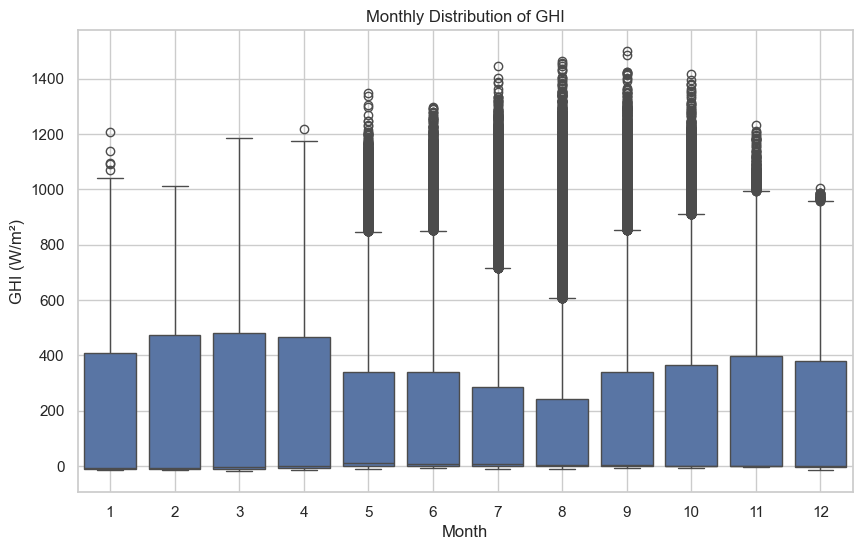

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='GHI', data=df)
plt.title('Monthly Distribution of GHI')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

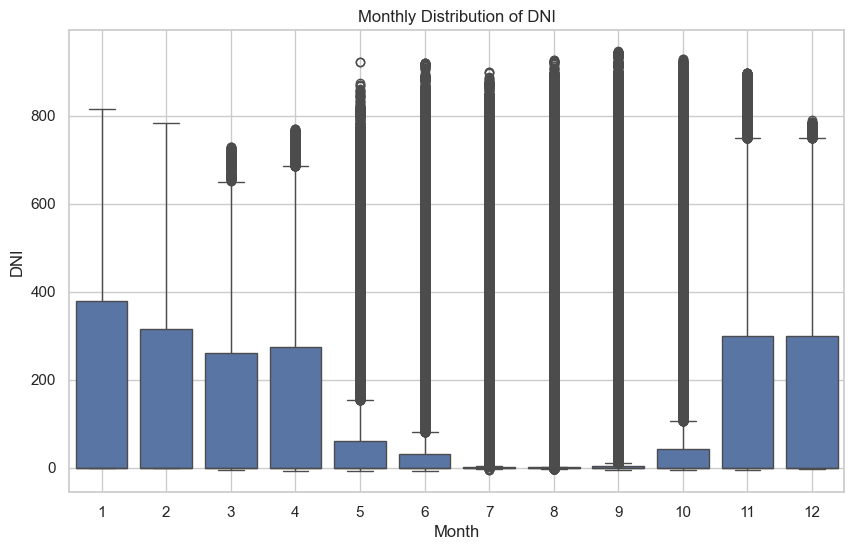

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='DNI', data=df)
plt.title('Monthly Distribution of DNI')
plt.xlabel('Month')
plt.ylabel('DNI')
plt.grid(True)
plt.show()

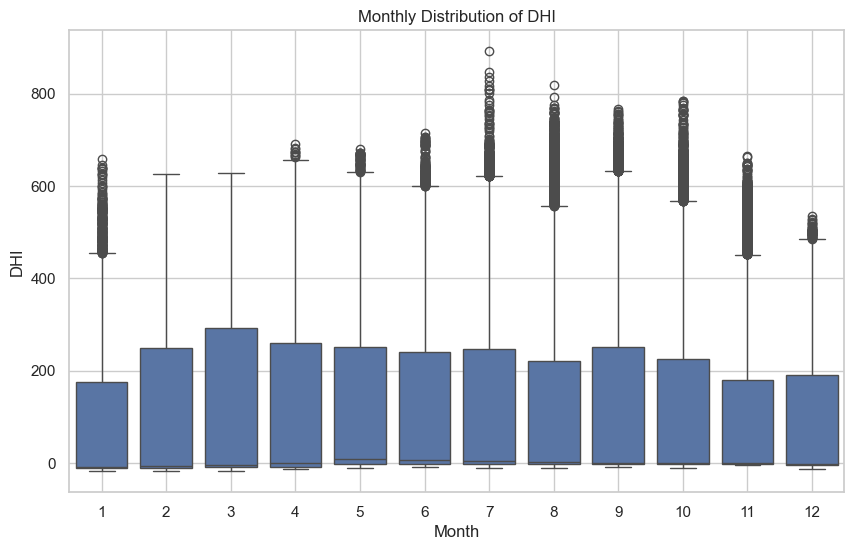

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='DHI', data=df)
plt.title('Monthly Distribution of DHI')
plt.xlabel('Month')
plt.ylabel('DHI')
plt.grid(True)
plt.show()

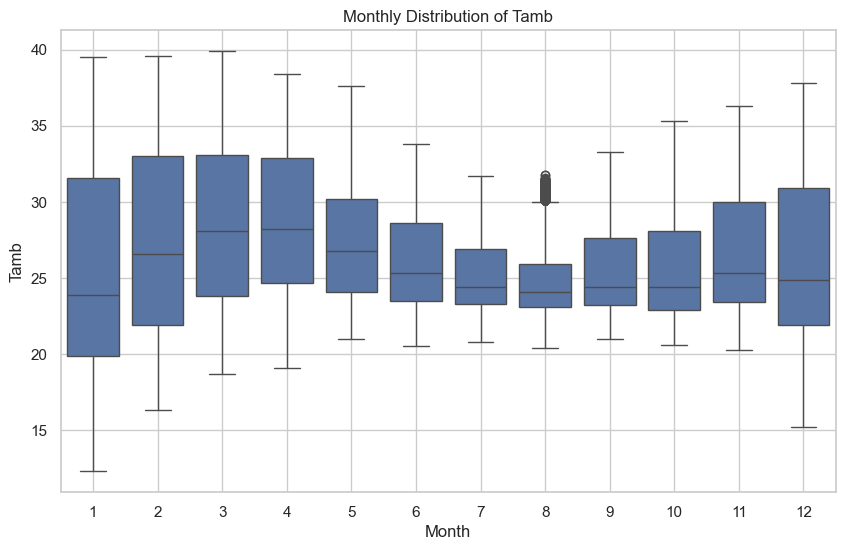

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Tamb', data=df)
plt.title('Monthly Distribution of Tamb')
plt.xlabel('Month')
plt.ylabel('Tamb')
plt.grid(True)
plt.show()

## Daily Pattern

In [29]:
df['Day'] = df['Timestamp'].dt.day

Plotting GHI by day


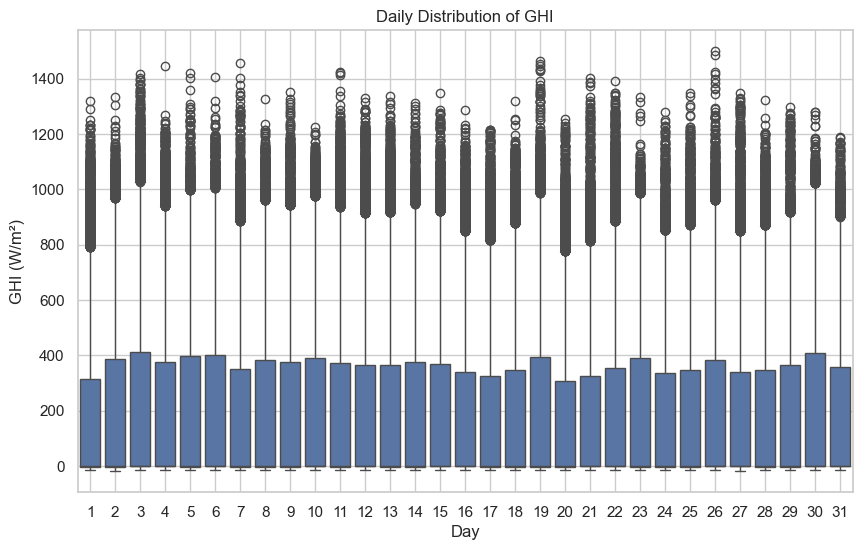

------------------------------------------------
Plotting averga hourly pattern for GHI


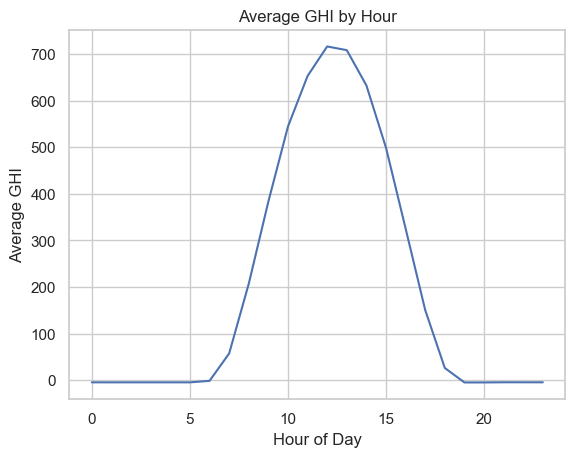

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Plotting GHI by day")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='GHI', data=df)
plt.title('Daily Distribution of GHI')
plt.xlabel('Day')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()
print("------------------------------------------------")
print("Plotting averga hourly pattern for GHI")
df['Hour'] = df['Timestamp'].dt.hour
hourly_mean = df.groupby('Hour')['GHI'].mean()
plt.plot(hourly_mean)
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI')
plt.title('Average GHI by Hour')
plt.show()

Plotting DNI by day


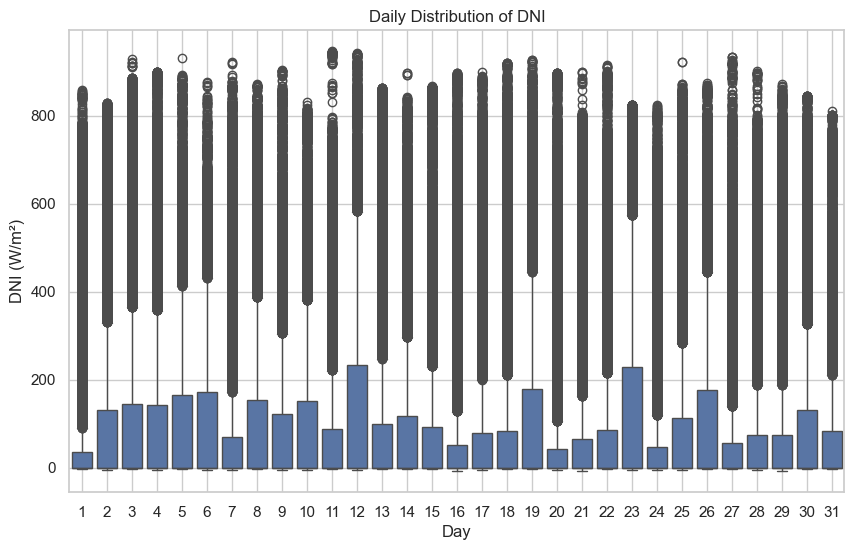

------------------------------------------------
Plotting averga hourly pattern for DNI


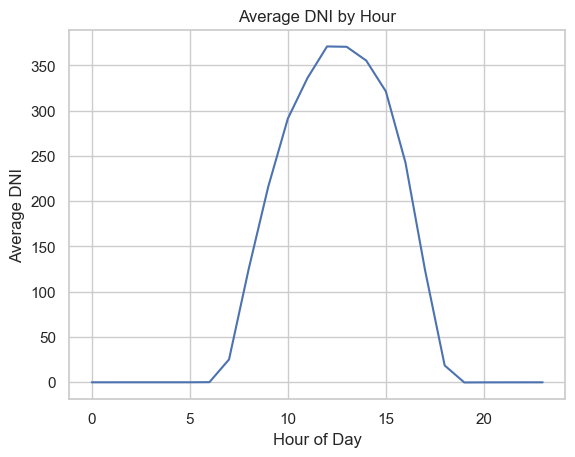

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Plotting DNI by day")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='DNI', data=df)
plt.title('Daily Distribution of DNI')
plt.xlabel('Day')
plt.ylabel('DNI (W/m²)')
plt.grid(True)
plt.show()
print("------------------------------------------------")
print("Plotting averga hourly pattern for DNI")
df['Hour'] = df['Timestamp'].dt.hour
hourly_mean = df.groupby('Hour')['DNI'].mean()
plt.plot(hourly_mean)
plt.xlabel('Hour of Day')
plt.ylabel('Average DNI')
plt.title('Average DNI by Hour')
plt.show()

Plotting DHI by day


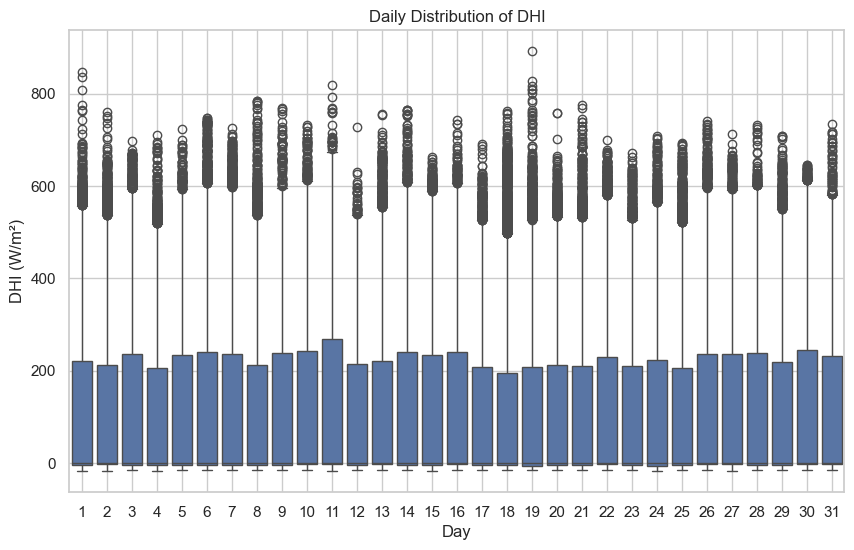

------------------------------------------------
Plotting averga hourly pattern for DHI


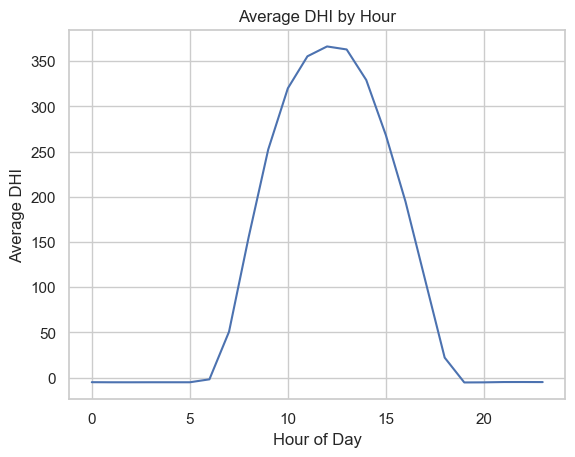

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Plotting DHI by day")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='DHI', data=df)
plt.title('Daily Distribution of DHI')
plt.xlabel('Day')
plt.ylabel('DHI (W/m²)')
plt.grid(True)
plt.show()
print("------------------------------------------------")
print("Plotting averga hourly pattern for DHI")
df['Hour'] = df['Timestamp'].dt.hour
hourly_mean = df.groupby('Hour')['DHI'].mean()
plt.plot(hourly_mean)
plt.xlabel('Hour of Day')
plt.ylabel('Average DHI')
plt.title('Average DHI by Hour')
plt.show()

Plotting Tamb by day


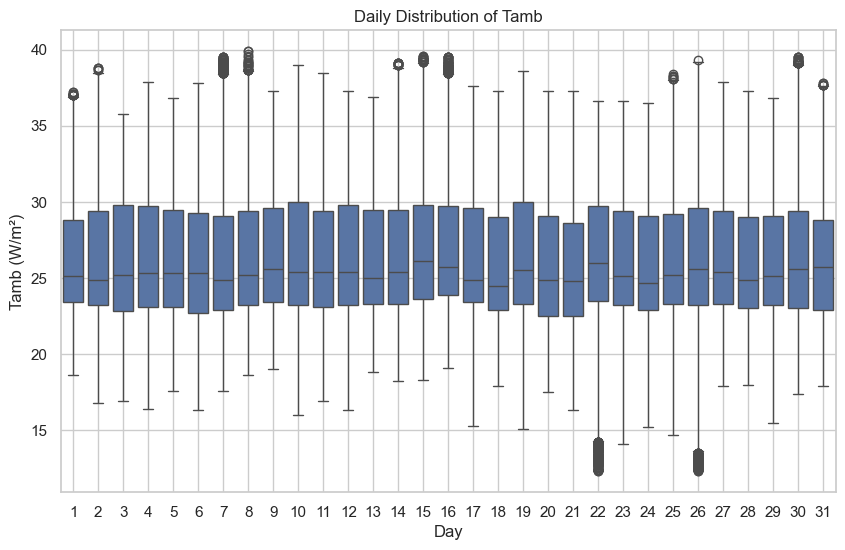

------------------------------------------------
Plotting averga hourly pattern for Tamb


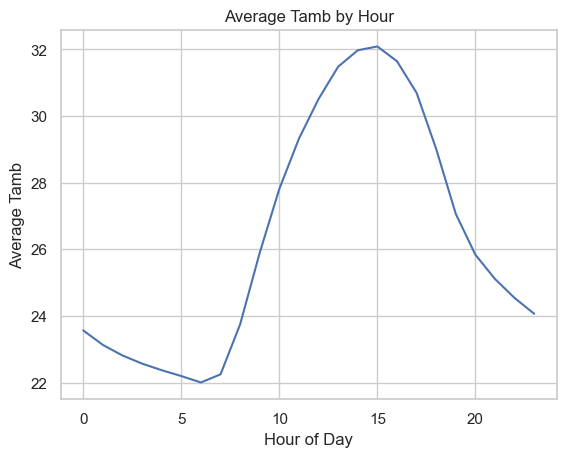

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Plotting Tamb by day")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='Tamb', data=df)
plt.title('Daily Distribution of Tamb')
plt.xlabel('Day')
plt.ylabel('Tamb (W/m²)')
plt.grid(True)
plt.show()
print("------------------------------------------------")
print("Plotting averga hourly pattern for Tamb")
df['Hour'] = df['Timestamp'].dt.hour
hourly_mean = df.groupby('Hour')['Tamb'].mean()
plt.plot(hourly_mean)
plt.xlabel('Hour of Day')
plt.ylabel('Average Tamb')
plt.title('Average Tamb by Hour')
plt.show()

## Cleaning Impact

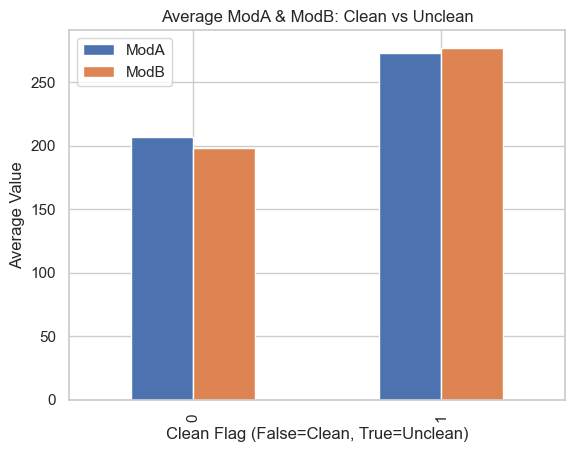

In [35]:
grouped = df_with_outliers.groupby('Cleaning')[['ModA', 'ModB']].mean()

grouped.plot(kind='bar')
plt.title('Average ModA & ModB: Clean vs Unclean')
plt.xlabel('Clean Flag (False=Clean, True=Unclean)')
plt.ylabel('Average Value')
plt.show()

In [36]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Month', 'Day', 'Hour'],
      dtype='object')

## Correlation & Relationship Analysis

### Heatmap of Correlations

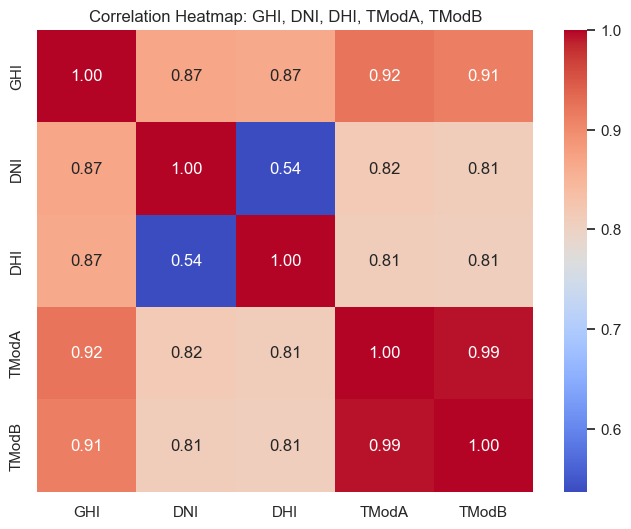

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.show()

### Scatter Plots

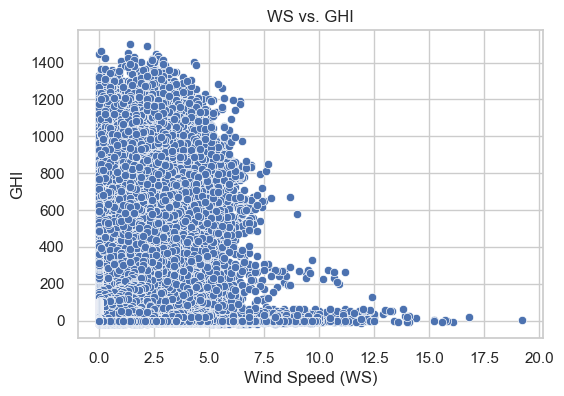

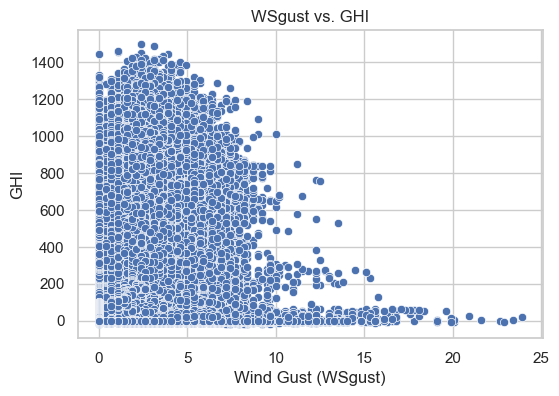

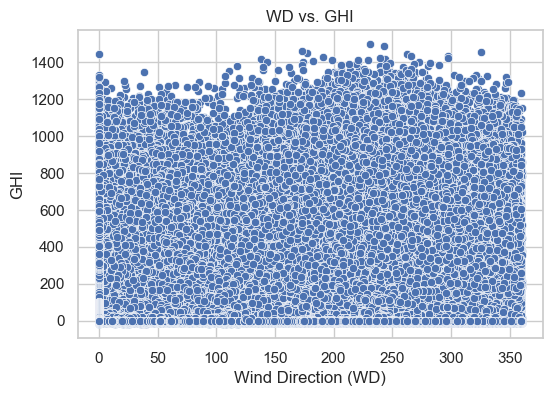

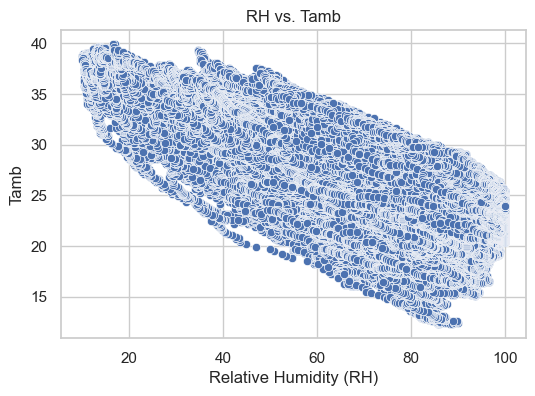

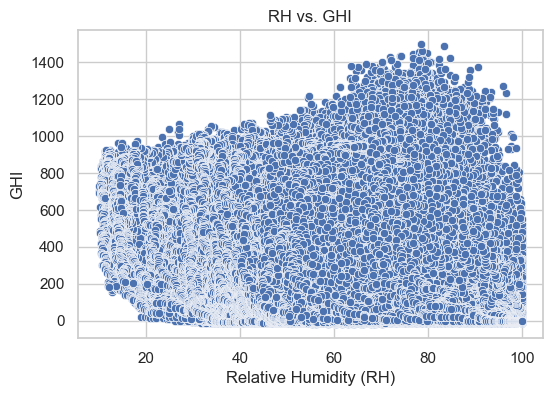

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: WS vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

# Scatter plot: WSgust vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('WSgust vs. GHI')
plt.xlabel('Wind Gust (WSgust)')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

# Scatter plot: WD vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title('WD vs. GHI')
plt.xlabel('Wind Direction (WD)')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

# Scatter plot: RH vs. Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Tamb')
plt.grid(True)
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

## Wind and Distribution Analysis

!pip install windrose

In [39]:
pip install windrose

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: windrose in d:\software career\kifiya 10 academy\week0\solar-challenge-week1\env\lib\site-packages (1.9.2)



You should consider upgrading via the 'd:\Software Career\Kifiya 10 Academy\week0\solar-challenge-week1\env\Scripts\python.exe -m pip install --upgrade pip' command.


<Figure size 800x800 with 0 Axes>

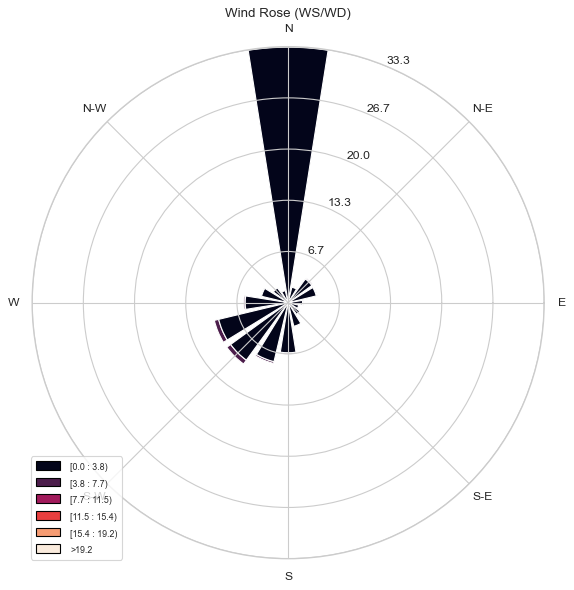

In [40]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Drop NA values for WS and WD
df_wr = df[['WS', 'WD']].dropna()

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_wr['WD'], df_wr['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (WS/WD)')
plt.show()

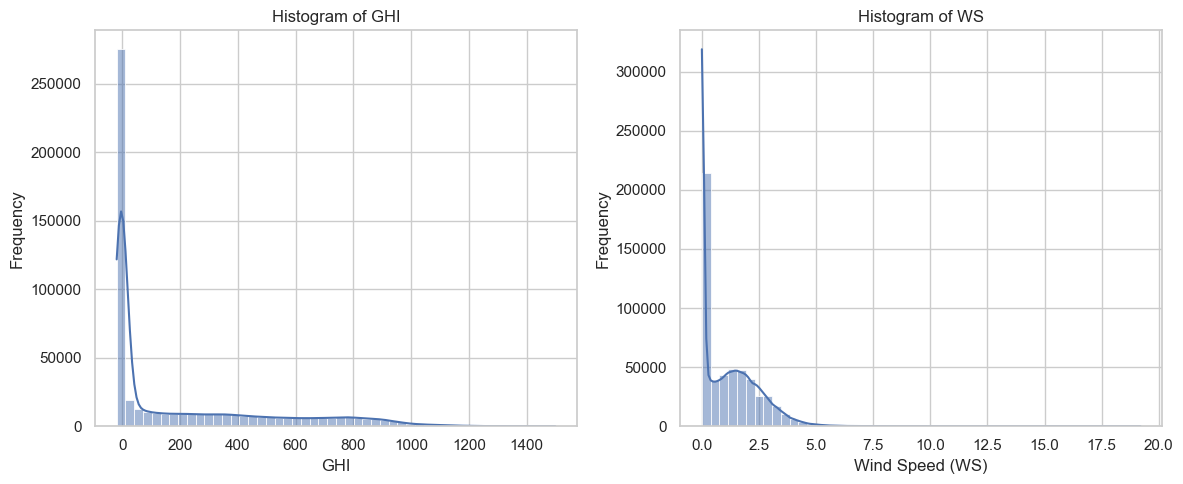

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=50, kde=True)
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=50, kde=True)
plt.title('Histogram of WS')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Temprature Analysis

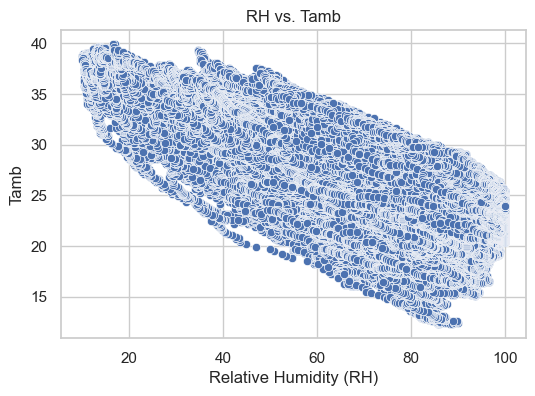

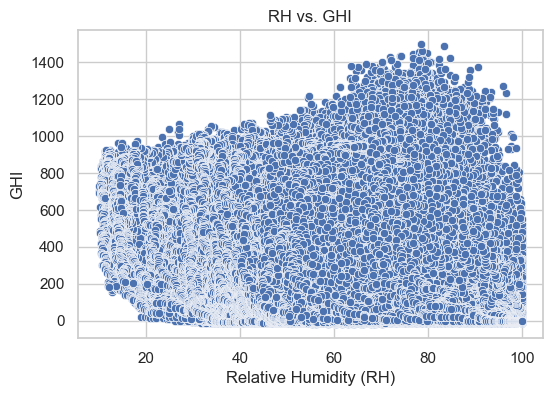

In [42]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Tamb')
plt.grid(True)
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

## Bubble Chart

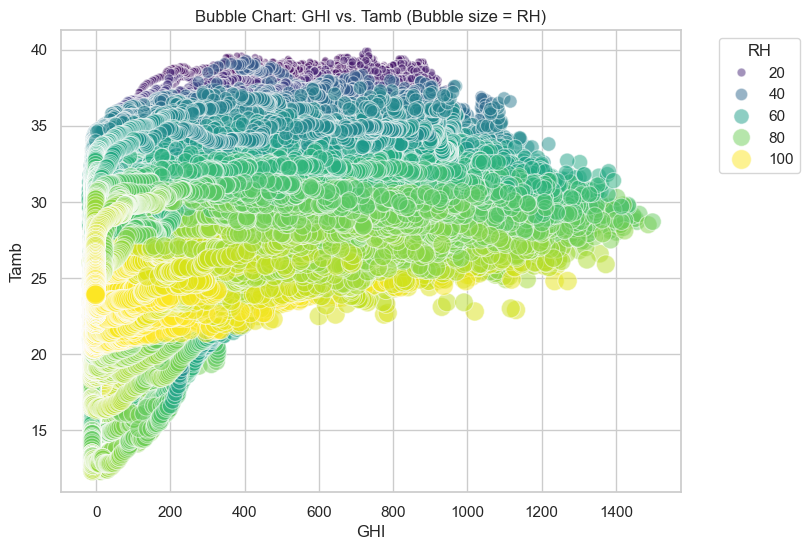

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='GHI',
    y='Tamb',
    size='RH',           # Bubble size by RH
    hue='RH',            # Optional: color by RH
    sizes=(20, 200),     # Adjust min/max bubble size
    alpha=0.5,
    palette='viridis'
)
plt.title('Bubble Chart: GHI vs. Tamb (Bubble size = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.legend(title='RH', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()